Stopped scribbling
Started scribbling at (50, 92)
Drawing to (52, 92)
Drawing to (54, 92)
Drawing to (57, 93)
Drawing to (62, 95)
Drawing to (68, 97)
Drawing to (73, 99)
Drawing to (79, 101)
Drawing to (85, 103)
Drawing to (88, 104)
Drawing to (90, 105)
Drawing to (94, 108)
Drawing to (96, 109)
Drawing to (98, 111)
Drawing to (101, 114)
Drawing to (103, 116)
Drawing to (105, 119)
Drawing to (106, 123)
Drawing to (109, 126)
Drawing to (110, 128)
Drawing to (113, 132)
Drawing to (114, 135)
Drawing to (114, 138)
Drawing to (115, 141)
Drawing to (115, 145)
Drawing to (116, 149)
Drawing to (116, 152)
Drawing to (116, 156)
Drawing to (116, 159)
Drawing to (115, 162)
Drawing to (114, 165)
Drawing to (112, 167)
Drawing to (111, 169)
Drawing to (109, 173)
Drawing to (108, 175)
Drawing to (106, 176)
Drawing to (104, 179)
Drawing to (103, 179)
Drawing to (99, 181)
Drawing to (98, 182)
Drawing to (96, 185)
Drawing to (93, 187)
Drawing to (92, 189)
Drawing to (90, 192)
Drawing to (87, 193)
Drawing 

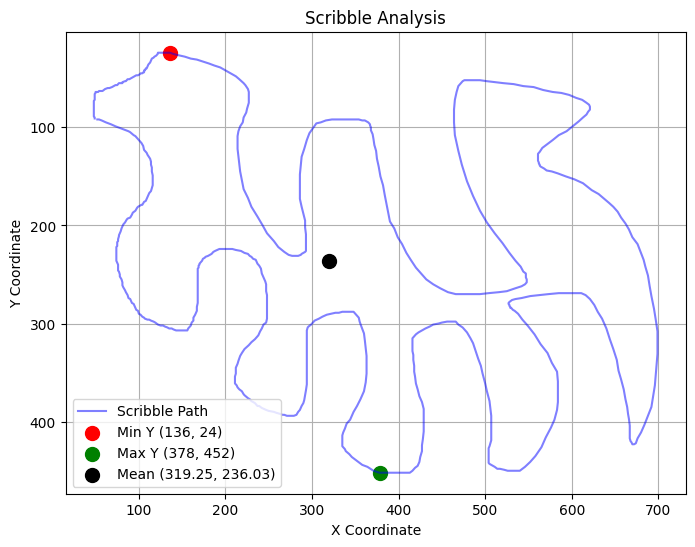

Canvas cleared


In [1]:
import tkinter as tk
from tkinter import ttk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

class ScribbleApp:
    """A Tkinter-based drawing application with NumPy and Pandas integration."""
    
    def __init__(self, root):
        self.root = root
        self.root.title("Scribble Me - Drawing App")
        self.canvas_width = 700
        self.canvas_height = 500
        self.draw_enabled = False
        self.prev_x, self.prev_y = None, None
        self.scribble_data = []
        self.current_color = "green"
        
        self.canvas = tk.Canvas(root, width=self.canvas_width, height=self.canvas_height, bg="black")
        self.canvas.pack(side="top", fill="both", expand=True)

        self.button_frame = tk.Frame(root, bg="grey")
        self.button_frame.pack(side="bottom", fill="x")

        self.df = pd.DataFrame(columns=["x", "y", "timestamp", "color"])

        self.setup_ui()

        self.canvas.bind("<ButtonPress-1>", self.start_scribble)
        self.canvas.bind("<B1-Motion>", self.draw_scribble)
        self.canvas.bind("<ButtonRelease-1>", self.stop_scribble)
        self.canvas.bind("<Enter>", self.change_cursor_to_pen)
        self.canvas.bind("<Leave>", self.change_cursor_to_arrow)
    
    def setup_ui(self):
        self.scribble_btn = ttk.Button(
            self.button_frame, text="Start Scribble", command=self.toggle_scribble, style="TButton"
        )
        self.erase_btn = ttk.Button(
            self.button_frame, text="Erase All", command=self.erase_canvas, style="TButton"
        )
        self.plot_btn = ttk.Button(
            self.button_frame, text="Plot Scribble", command=self.plot_scribble, style="TButton"
        )
        self.save_btn = ttk.Button(
            self.button_frame, text="Save Data", command=self.save_data, style="TButton"
        )

        self.color_var = tk.StringVar(value="green")
        colors = ["green", "blue", "red", "yellow", "white"]
        self.color_menu = ttk.Combobox(self.button_frame, textvariable=self.color_var, values=colors, state="readonly")
        self.color_menu.bind("<<ComboboxSelected>>", self.update_color)

        style = ttk.Style()
        style.configure("TButton", padding=10, font=("Arial", 10))

        self.scribble_btn.pack(side="right", padx=10, pady=10)
        self.erase_btn.pack(side="left", padx=10, pady=10)
        self.plot_btn.pack(side="left", padx=10, pady=10)
        self.save_btn.pack(side="left", padx=10, pady=10)
        self.color_menu.pack(side="left", padx=10, pady=10)

    def start_scribble(self, event):
        if self.draw_enabled:
            self.prev_x, self.prev_y = event.x, event.y
            print(f"Started scribbling at ({event.x}, {event.y})")

    def draw_scribble(self, event):
        if self.draw_enabled and self.prev_x is not None and self.prev_y is not None:
            self.canvas.create_line(self.prev_x, self.prev_y, event.x, event.y, fill=self.current_color, width=2)
            self.scribble_data.append({
                "x": event.x,
                "y": event.y,
                "timestamp": datetime.now(),
                "color": self.current_color,
            })
            print(f"Drawing to ({event.x}, {event.y})")
        self.prev_x, self.prev_y = event.x, event.y

    def stop_scribble(self, event):
        self.draw_enabled = False
        self.prev_x, self.prev_y = None, None
        self.scribble_btn.configure(text="Start Scribble")
        print("Stopped scribbling")

    def toggle_scribble(self):
        self.draw_enabled = not self.draw_enabled
        self.prev_x, self.prev_y = None, None
        self.scribble_btn.configure(text="Stop Scribble" if self.draw_enabled else "Start Scribble")

    def erase_canvas(self):
        try:
            self.canvas.delete("all")
            self.scribble_data.clear()
            self.df = pd.DataFrame(columns=["x", "y", "timestamp", "color"])
            self.draw_enabled = True
            self.scribble_btn.configure(text="Start Scribble")
            print("Canvas cleared")
        except Exception as e:
            print(f"Error clearing canvas: {e}")

    def change_cursor_to_pen(self, event=None):
        self.canvas.config(cursor="pencil")

    def change_cursor_to_arrow(self, event=None):
        self.canvas.config(cursor="arrow")

    def update_color(self, event):
        self.current_color = self.color_var.get()
        print(f"Color changed to {self.current_color}")

    def save_data(self):
        try:
            if self.scribble_data:
                self.df = pd.DataFrame(self.scribble_data)
                filename = f"scribble_{datetime.now().strftime('%Y%m%d_%H%M%S')}.csv"
                self.df.to_csv(filename, index=False)
                print(f"Data saved to {filename}")
            else:
                print("No scribble data to save.")
        except Exception as e:
            print(f"Error saving data: {e}")

    def plot_scribble(self):
        try:
            if not self.scribble_data:
                print("No scribble data available to plot.")
                return

            self.df = pd.DataFrame(self.scribble_data)
            x = self.df["x"].to_numpy()
            y = self.df["y"].to_numpy()

            min_y_idx = np.argmin(y)
            max_y_idx = np.argmax(y)
            mean_x, mean_y = np.mean(x), np.mean(y)

            plt.figure(figsize=(8, 6))
            plt.title("Scribble Analysis")
            plt.plot(x, y, linestyle="-", color="blue", alpha=0.5, label="Scribble Path")
            plt.scatter(x[min_y_idx], y[min_y_idx], label=f"Min Y ({x[min_y_idx]}, {y[min_y_idx]})", color="red", s=100)
            plt.scatter(x[max_y_idx], y[max_y_idx], label=f"Max Y ({x[max_y_idx]}, {y[max_y_idx]})", color="green", s=100)
            plt.scatter(mean_x, mean_y, label=f"Mean ({mean_x:.2f}, {mean_y:.2f})", color="black", s=100)

            plt.gca().invert_yaxis()
            plt.legend()
            plt.xlabel("X Coordinate")
            plt.ylabel("Y Coordinate")
            plt.grid(True)
            plt.show()

            self.erase_canvas()

        except Exception as e:
            print(f"Error plotting scribble: {e}")

if __name__ == "__main__":
    root = tk.Tk()
    app = ScribbleApp(root)
    root.mainloop()
